mu          0.014315
omega       0.001429
alpha[1]    0.108519
beta[1]     0.891481
eta         3.292070
lambda     -0.022878
Name: params, dtype: float64
Beginning Simulations...
Completed Simulation # 1

1 Simulation(s) Completed in 0 hour(s), 0 minute(s), and 0.70 second(s)
------------------------------------------------------------------------
Simulated prices from 7 year(s), 5 month(s), and 19 day(s) of historical data
Average Profit/Loss: $2,857.97
Profit/Loss Ranges from $2,857.97 - $2,857.97
Probability of Earning a Return = 100.00%
The VaR at 95% Confidence is: $2,857.97
------------------------------------------------------------------------


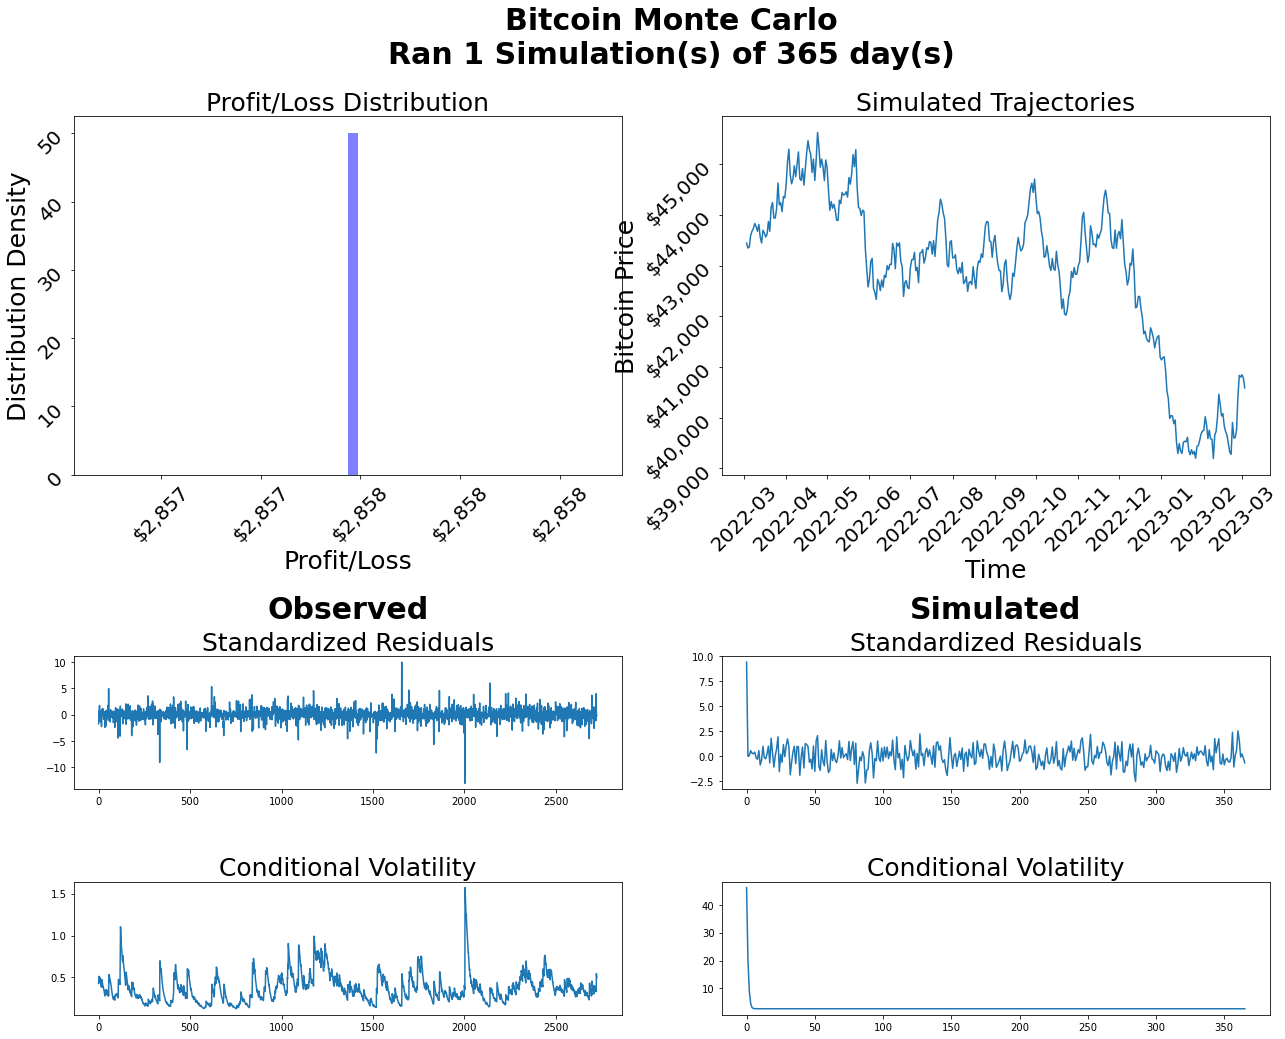

In [6]:
from Bitcoin_MonteCarlo import TimeSeries_MonteCarlo
import pmdarima
from arch import arch_model
import numpy as np

trading_days = 365
horizon = 365
model = 'Returns'
simulations = 1
options_info = dict(type='Asian', strike='geometric', interval=4) # Only necessary if model='Options', can be European or Asian.
risk_free_rate = .03
ticker = 'BTC-USD'
arch_garch = dict(vol='GARCH', p=1, q=1, o=0, mean="Constant", rescale=True, dist='skewt') # These are default values, can be changed
arima = dict(information_criterion='bic') # These are default values, can be changed
period = 'max' # Can also have a start/end data,  dict(start='2000-01-01',end='2015-01-01')

TS = TimeSeries_MonteCarlo(ticker=ticker, period=period, model=model, horizon=horizon, trading_days=trading_days, options_info=options_info, risk_free_rate=risk_free_rate, arima=arima,arch_garch=arch_garch)
print(TS.fitted_model.params)
TS.RunSimulation(simulations)
TS.Simulation_Statistics()

Beginning Simulations...
Completed Simulation # 1

1 Simulation(s) Completed in 0 hour(s), 0 minute(s), and 0.55 second(s)
------------------------------------------------------------------------
Simulated prices from 7 year(s), 5 month(s), and 19 day(s) of historical data
Average Profit/Loss: $-7,515.50
Profit/Loss Ranges from $-7,515.50 - $-7,515.50
Probability of Earning a Return = 0.00%
The VaR at 95% Confidence is: $-7,515.50
------------------------------------------------------------------------


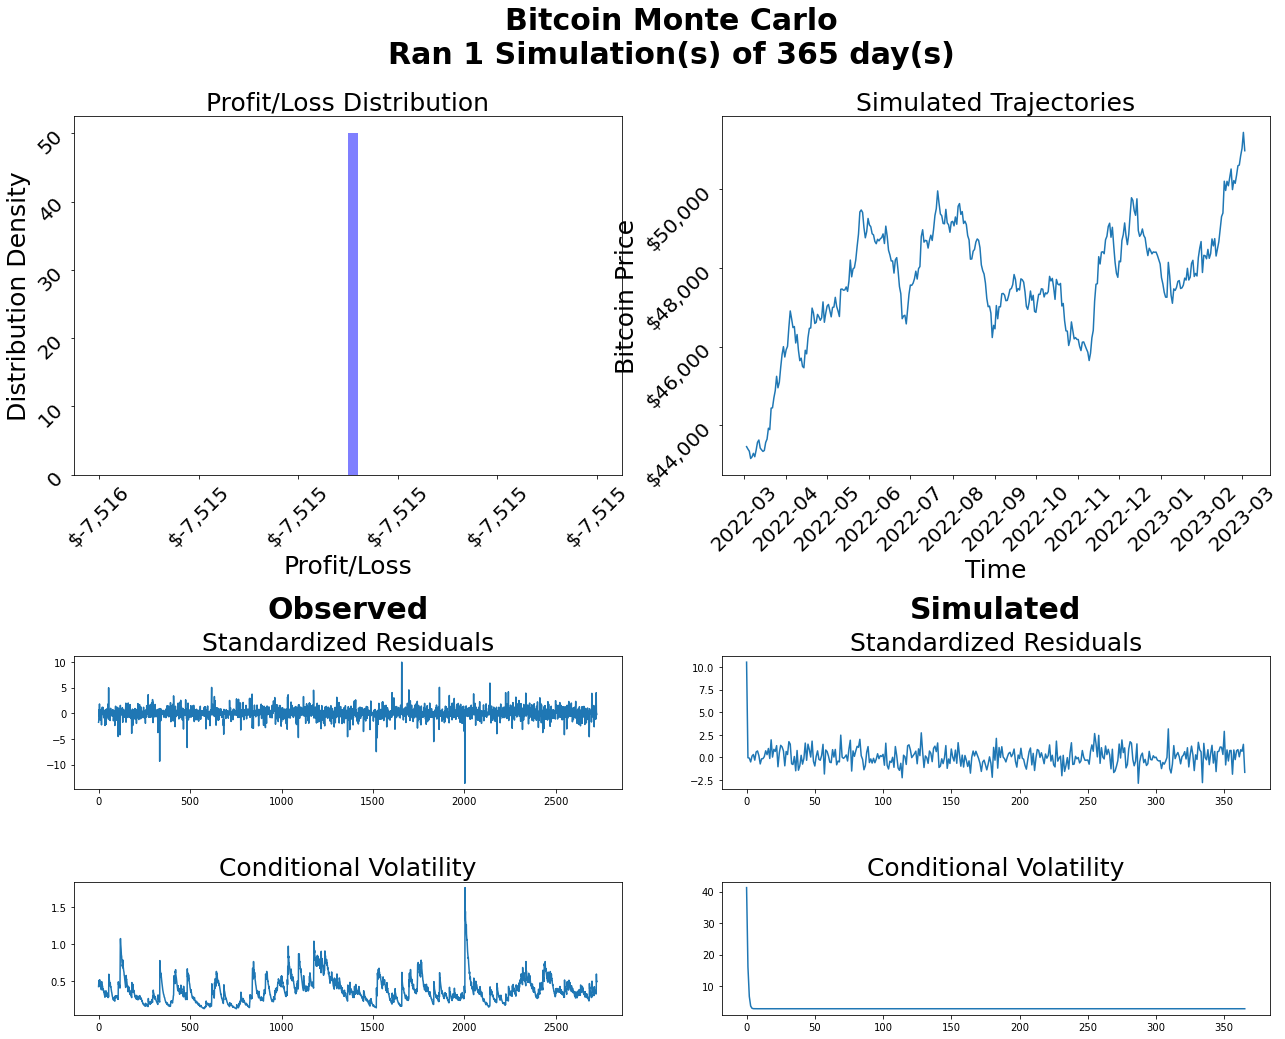

In [8]:
arch_garch = dict(vol='GARCH', p=2, q=2, mean="Zero", rescale=True, dist='t') # These are default values, can be changed
TS = TimeSeries_MonteCarlo(ticker=ticker, period=period, model=model, horizon=horizon, trading_days=trading_days, options_info=options_info, risk_free_rate=risk_free_rate, arima=arima,arch_garch=arch_garch)
TS.RunSimulation(simulations)
TS.Simulation_Statistics()


Beginning Simulations...
Completed Simulation # 1

1 Simulation(s) Completed in 0 hour(s), 0 minute(s), and 0.57 second(s)
------------------------------------------------------------------------
Simulated prices from 7 year(s), 5 month(s), and 19 day(s) of historical data
Average Profit/Loss: $-5,139.71
Profit/Loss Ranges from $-5,139.71 - $-5,139.71
Probability of Earning a Return = 0.00%
The VaR at 95% Confidence is: $-5,139.71
------------------------------------------------------------------------


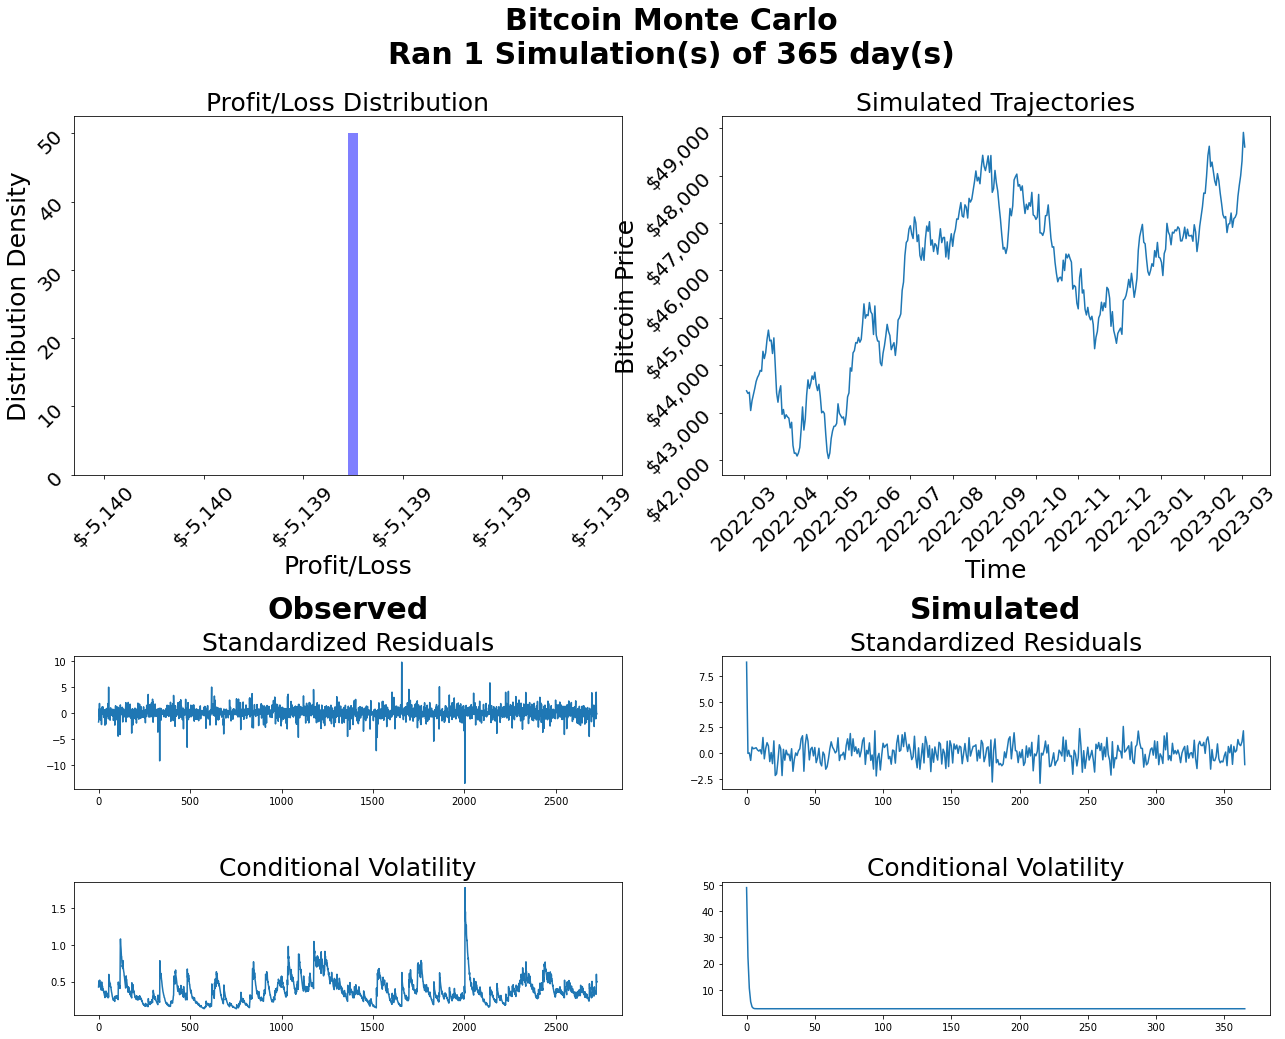

In [9]:
arch_garch = dict(vol='GARCH', p=2, q=2, mean="Zero", rescale=True, dist='skewt') # These are default values, can be changed
TS = TimeSeries_MonteCarlo(ticker=ticker, period=period, model=model, horizon=horizon, trading_days=trading_days, options_info=options_info, risk_free_rate=risk_free_rate, arima=arima,arch_garch=arch_garch)
TS.RunSimulation(simulations)
TS.Simulation_Statistics()


Beginning Simulations...
Completed Simulation # 1

1 Simulation(s) Completed in 0 hour(s), 0 minute(s), and 0.52 second(s)
------------------------------------------------------------------------
Simulated prices from 7 year(s), 5 month(s), and 19 day(s) of historical data
Average Profit/Loss: $3,427.09
Profit/Loss Ranges from $3,427.09 - $3,427.09
Probability of Earning a Return = 100.00%
The VaR at 95% Confidence is: $3,427.09
------------------------------------------------------------------------


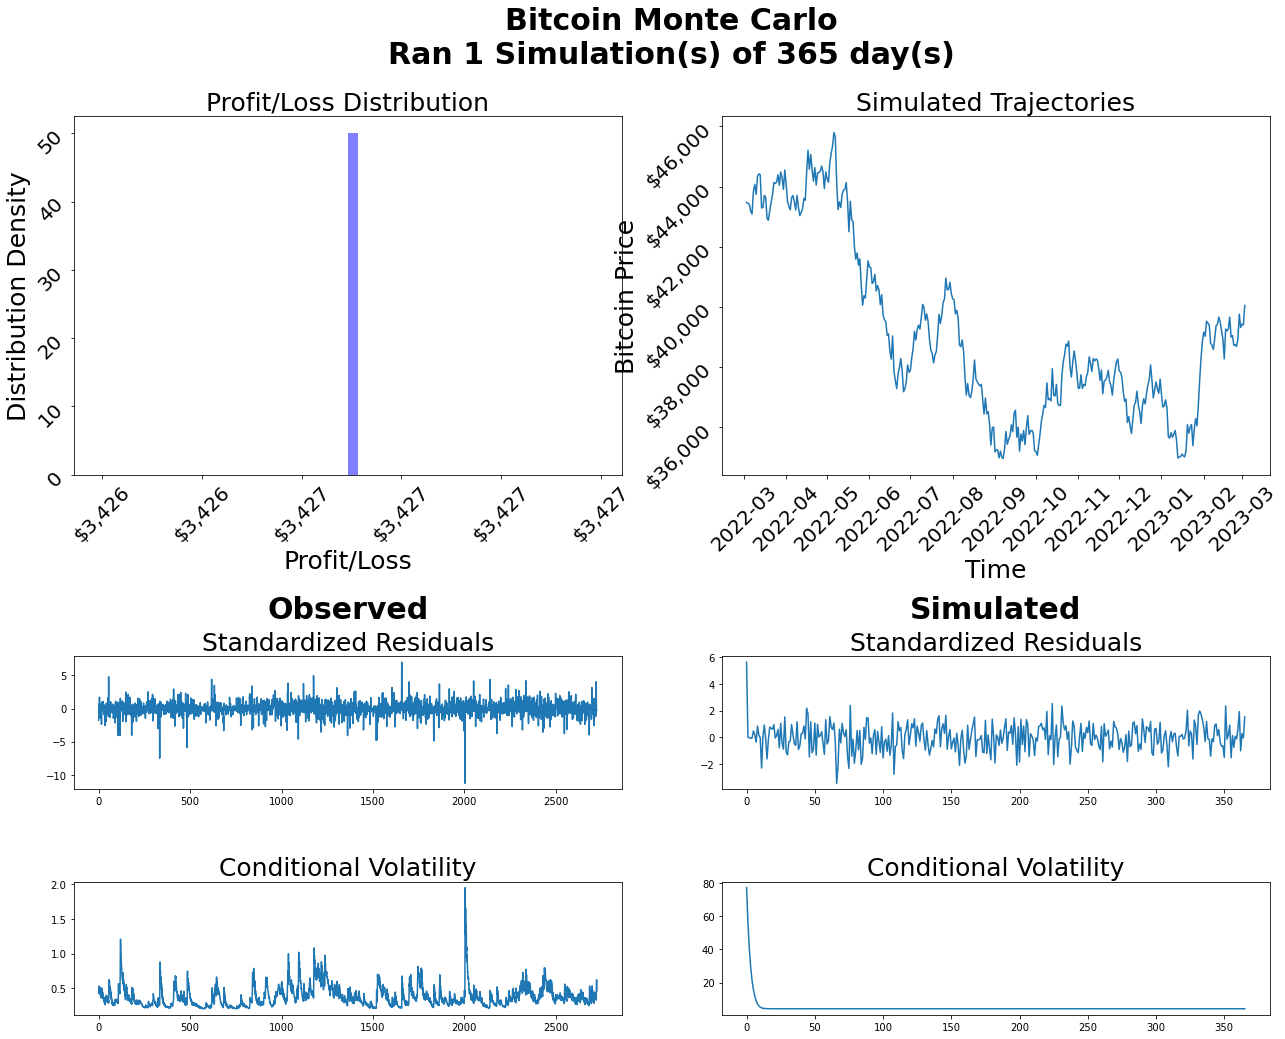

In [10]:
arch_garch = dict(vol='GARCH', p=2, q=2, mean="Constant", rescale=True, dist='normal') # These are default values, can be changed
TS = TimeSeries_MonteCarlo(ticker=ticker, period=period, model=model, horizon=horizon, trading_days=trading_days, options_info=options_info, risk_free_rate=risk_free_rate, arima=arima,arch_garch=arch_garch)
TS.RunSimulation(simulations)
TS.Simulation_Statistics()


# sigma^2_t = .0014 + .108 * return_(t-1)^2 + .892 * sigma^2_(t-1)


Beginning Simulations...
Completed Simulation # 1

1 Simulation(s) Completed in 0 hour(s), 0 minute(s), and 0.56 second(s)
------------------------------------------------------------------------
Simulated prices from 7 year(s), 5 month(s), and 19 day(s) of historical data
Average Profit/Loss: $-6,683.42
Profit/Loss Ranges from $-6,683.42 - $-6,683.42
Probability of Earning a Return = 0.00%
The VaR at 95% Confidence is: $-6,683.42
------------------------------------------------------------------------


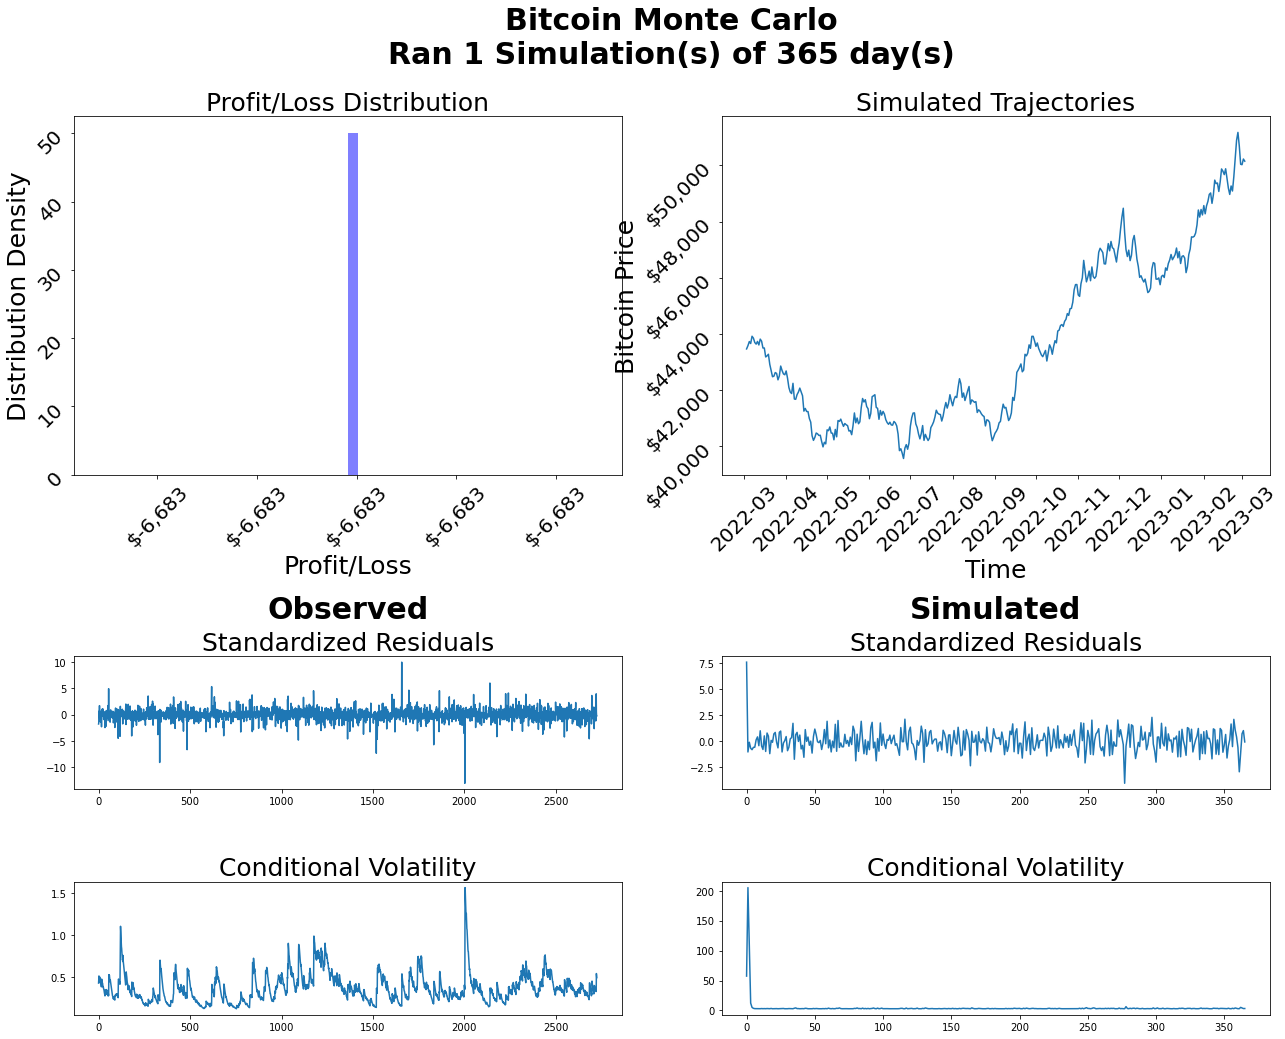

In [11]:
arch_garch = dict(vol='GARCH', p=2, q=2, mean="Constant", rescale=True, dist='t') # These are default values, can be changed
TS = TimeSeries_MonteCarlo(ticker=ticker, period=period, model=model, horizon=horizon, trading_days=trading_days, options_info=options_info, risk_free_rate=risk_free_rate, arima=arima,arch_garch=arch_garch)
TS.RunSimulation(simulations)
TS.Simulation_Statistics()


mu          0.014310
omega       0.001741
alpha[1]    0.141140
alpha[2]    0.000000
beta[1]     0.514812
beta[2]     0.344048
eta         3.307100
lambda     -0.023276
Name: params, dtype: float64
Beginning Simulations...
Completed Simulation # 1

1 Simulation(s) Completed in 0 hour(s), 0 minute(s), and 0.67 second(s)
------------------------------------------------------------------------
Simulated prices from 7 year(s), 5 month(s), and 19 day(s) of historical data
Average Profit/Loss: $-5,266.00
Profit/Loss Ranges from $-5,266.00 - $-5,266.00
Probability of Earning a Return = 0.00%
The VaR at 95% Confidence is: $-5,266.00
------------------------------------------------------------------------


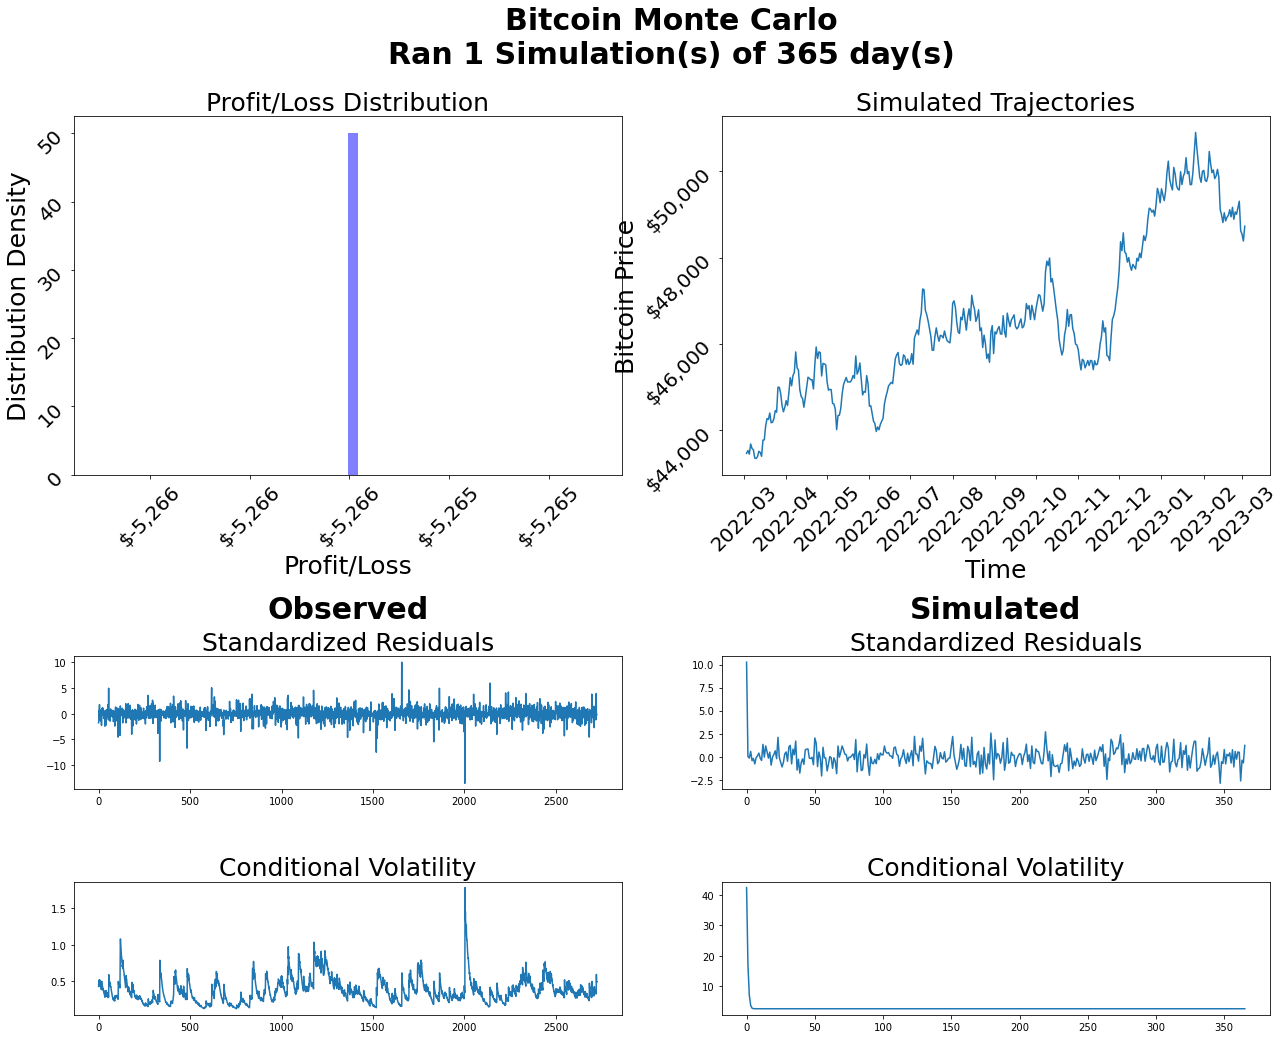

In [13]:
arch_garch = dict(vol='GARCH', p=2, q=2, mean="Constant", rescale=True, dist='skewt') # These are default values, can be changed
TS = TimeSeries_MonteCarlo(ticker=ticker, period=period, model=model, horizon=horizon, trading_days=trading_days, options_info=options_info, risk_free_rate=risk_free_rate, arima=arima,arch_garch=arch_garch)
print(TS.fitted_model.params)
TS.RunSimulation(simulations)
TS.Simulation_Statistics()
